In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [14]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [15]:
# 딥러닝 모델 구성
# 초기 모델 설정 tf.keras.models (초기 설정)
# 딥러닝 모델을 쌓을때 tf.keras.layers(모델 구성)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #mnist 28*28로 되어있는 데이터 데이터의 형태를 입력!
    tf.keras.layers.Dense(128, activation='relu'), #첫번째 층은 128개의 동그라미로 구성
    tf.keras.layers.Dropout(0.2), #과적합을 방지
    tf.keras.layers.Dense(10) #0~9 출력 데이터
])

In [16]:
model.compile(optimizer='adam', #옵티마이저
              loss = 'sparse_categorical_crossentropy', #손실함수 -> 다중분류일때 사용(3가지 이상)
              metrics = ['accuracy']) # 평가지표

In [17]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1003 - loss: 5.6980
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1019 - loss: 4.7541
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0996 - loss: 4.5173
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.1001 - loss: 4.4538
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.0992 - loss: 4.8250


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Fashion MNIST 데이터셋 로드
# TensorFlow의 keras.datasets 모듈을 사용하여 데이터셋을 로드합니다.
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 클래스 이름 정의
# 각 레이블에 해당하는 클래스 이름을 정의합니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터셋 기본 정보 출력
# 데이터셋의 형태와 크기를 출력합니다.
print(f"훈련 이미지 형태: {train_images.shape}")
print(f"훈련 레이블 형태: {train_labels.shape}")
print(f"테스트 이미지 형태: {test_images.shape}")
print(f"테스트 레이블 형태: {test_labels.shape}")

# 이미지 시각화 함수
# 주어진 이미지와 레이블을 시각화하는 함수입니다.
def plot_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {class_names[label]}")
    plt.axis('off')

# 샘플 이미지 시각화
# 훈련 데이터셋에서 25개의 이미지를 샘플로 시각화합니다.
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plot_image(train_images[i], train_labels[i])
plt.tight_layout()
plt.show()

# 픽셀 값 분포 확인
# 픽셀 값의 분포를 히스토그램으로 나타내어 데이터의 특성을 파악합니다.
plt.figure(figsize=(10, 5))

# 전체 훈련 이미지의 픽셀 값 분포
plt.subplot(1, 2, 1)
plt.hist(train_images.ravel(), bins=50)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# 첫 번째 훈련 이미지 시각화
plt.subplot(1, 2, 2)
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Sample Image: {class_names[train_labels[0]]}')
plt.colorbar()
plt.show()

# 레이블 분포 확인
# 각 클래스별 이미지 수를 막대 그래프로 표시하여 클래스 분포를 확인합니다.
unique, counts = np.unique(train_labels, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(class_names, counts)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [20]:
# 데이터 전처리!
# 딥러닝 모델의 성능을 높이기 위해 데이터 전처리가 필요합니다. 일반적으로 사용하는 전처리 과정은 다음과 같습니다:

# 1. **정규화(Normalization)**: 이미지의 픽셀 값을 0-255에서 0-1 사이의 값으로 변환합니다.
# 2. **차원 확장(Reshaping)**: 모델 입력에 맞게 데이터의 차원을 변경합니다. 딥러닝!
# 3. **데이터 증가(Data Augmentation): 이미지에 대한 데이터가 부족할 경우 모델을 일반화하여 성능을 높이는 기법

# (train_images, train_labels), (test_images, test_labels)

# 픽셀값을 0~1사이로 정규화
train_images = train_images/225.0
test_images = test_images/225.0


In [ ]:
# 정규화된 첫 번째 이미지 확인
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Sample Image: {class_names[train_labels[0]]}')
plt.colorbar()
plt.show()

In [27]:
# 데이터 증강
# 부츠
# 90도 기울기
# 색상을 바꾸기
# 뒤집기 -> 좌우변환
# 크기를 줄이기

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
# 데이터 증강 설정

datagen = ImageDataGenerator(
    rotation_range = 10, #회전 범위
    width_shift_range = 0.1, # 가로 / 수평 이동 범위
    height_shift_range = 0.1, # 세로 / 수직 이동 범위
    horizontal_flip = True # 수평 반전 / 뒤집기
)


변경된 훈련 이미지 형태: (60000, 28, 28, 1)
변경된 테스트 이미지 형태: (10000, 28, 28, 1)


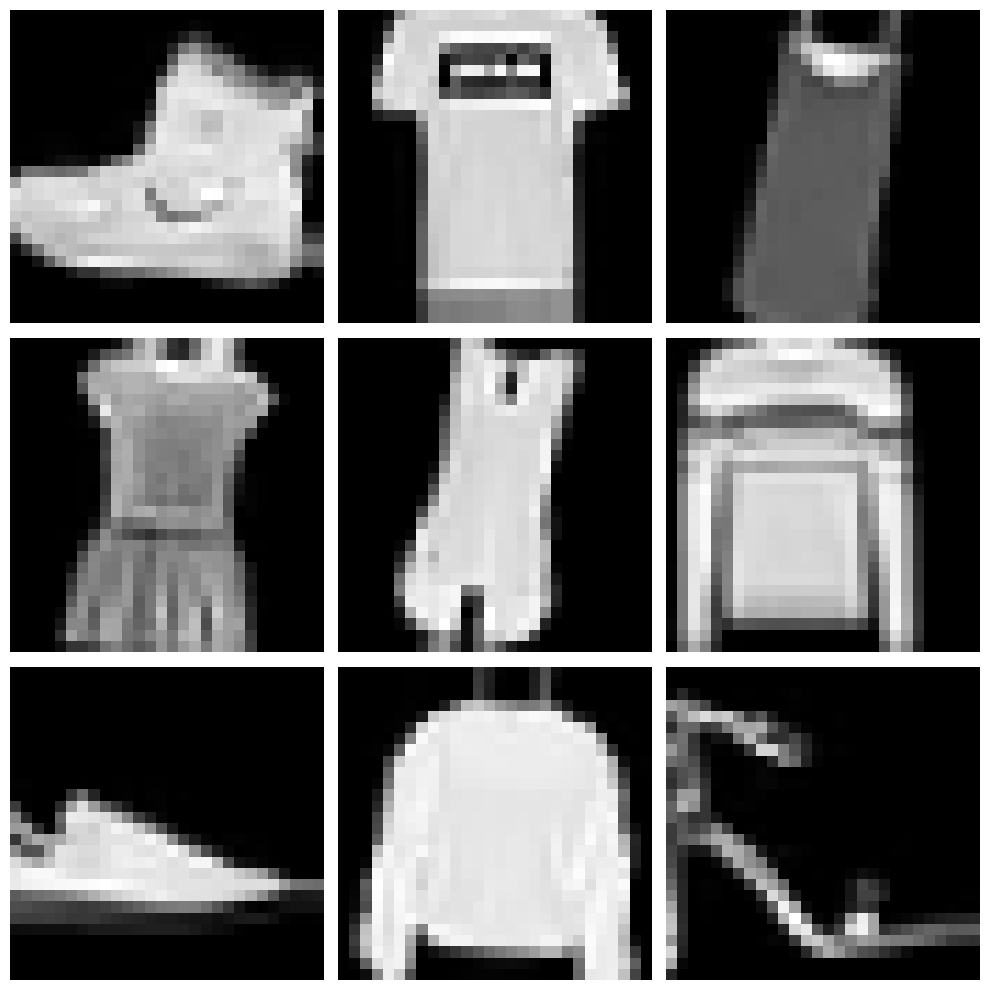

In [33]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print(f"변경된 훈련 이미지 형태: {train_images.shape}")
print(f"변경된 테스트 이미지 형태: {test_images.shape}")

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = datagen.random_transform(train_images[i])
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [36]:
import tensorflow as tf

# Sequential 모델 생성
model = tf.keras.Sequential()

# Flatten 레이어: 입력 이미지를 1차원 배열로 변환합니다.
model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))

# Dense 레이어: 은닉층 1, 뉴런 수 128, 활성화 함수 ReLU
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Dense 레이어: 은닉층 1, 뉴런 수 128, 활성화 함수 ReLU 8의 배수로 추가!
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Dense 레이어: 출력층, 뉴런 수 10 (클래스 수), 활성화 함수 Softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fashion MNIST 데이터셋 로드 및 전처리
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# 모델 훈련
model.fit(train_images, train_labels, epochs=50)

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\\n테스트 정확도: {test_acc}')

c:\Users\Nathan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7857 - loss: 0.6268
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8631 - loss: 0.3808
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8767 - loss: 0.3387
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8829 - loss: 0.3136
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8926 - loss: 0.2892
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8981 - loss: 0.2780
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9018 - loss: 0.2668
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9055 - loss: 0.2524
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9079 - loss: 0.2449
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9111 - loss: 0.2327
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9158 - loss: 0.2221
Epoch 12/50
1875/1875 ━━━━━━━━

In [37]:
model.summary(	)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [39]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Fashion MNIST 데이터셋 로드
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 데이터 전처리: 이미지 데이터를 0-1 범위로 정규화하고, 차원을 확장합니다.
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# 모델 구축
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28, 1)),  # 명시적 입력 레이어 추가
    keras.layers.Conv2D(32, (5, 5), activation='relu'),  # 첫 번째 컨볼루션 레이어
    keras.layers.MaxPooling2D((2, 2)),  # 첫 번째 풀링 레이어
    keras.layers.Flatten(),  # Flatten 레이어
    keras.layers.Dense(128, activation='relu'),  # 완전 연결 레이어
    keras.layers.Dense(10, activation='softmax')  # 출력 레이어
])

# 모델 구조 출력
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,074 (2.26 MB)

 Trainable params: 592,074 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8001 - loss: 0.5588 - val_accuracy: 0.8813 - val_loss: 0.3275
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8955 - loss: 0.2915 - val_accuracy: 0.8973 - val_loss: 0.2861
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9117 - loss: 0.2415 - val_accuracy: 0.9023 - val_loss: 0.2803
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9263 - loss: 0.2003 - val_accuracy: 0.9088 - val_loss: 0.2494
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9342 - loss: 0.1772 - val_accuracy: 0.9130 - val_loss: 0.2507
313/313 - 0s - 1ms/step - accuracy: 0.9094 - loss: 0.2611
\nTest accuracy: 0.9093999862670898


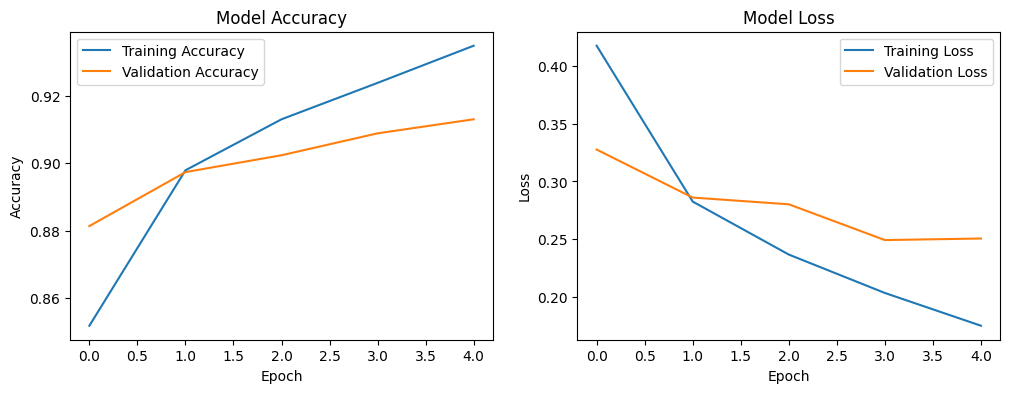

In [40]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\\nTest accuracy: {test_acc}')

import matplotlib.pyplot as plt

# 훈련 과정 시각화
plt.figure(figsize=(12, 4))

# 정확도 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 값 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
import tensorflow as tf

# GPU 장치 확인
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Running on default strategy.


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,074 (2.26 MB)

 Trainable params: 592,074 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7987 - loss: 0.5682 - val_accuracy: 0.8780 - val_loss: 0.3382
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8930 - loss: 0.2942 - val_accuracy: 0.8953 - val_loss: 0.2886
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9106 - loss: 0.2409 - val_accuracy: 0.9042 - val_loss: 0.2691
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9256 - loss: 0.2023 - val_accuracy: 0.9043 - val_loss: 0.2712
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9338 - loss: 0.1740 - val_accuracy: 0.9055 - val_loss: 0.2621

Total training time: 44.61 seconds
313/313 - 0s - 1ms/step - accuracy: 0.9017 - loss: 0.2805

Test accuracy: 0.9017000198364258


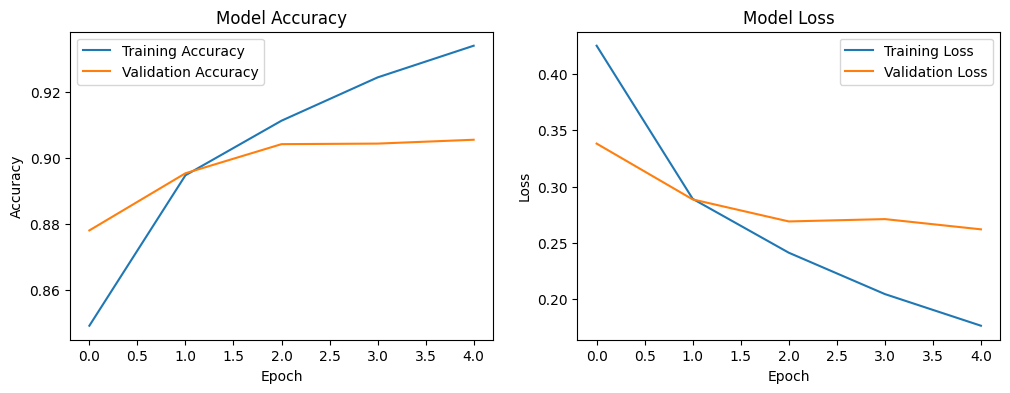

In [45]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time

# TPU 클러스터 초기화
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU 클러스터 인식
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("Running on TPU:", tpu.master())
except ValueError:
    strategy = tf.distribute.get_strategy()  # TPU가 없으면 기본 전략 사용
    print("Running on default strategy.")

# Fashion MNIST 데이터셋 로드
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 데이터 전처리
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# TPU 전략 범위 내에서 모델 구축 및 컴파일
with strategy.scope():
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(28, 28, 1)),  # 명시적 입력 레이어 추가
        keras.layers.Conv2D(32, (5, 5), activation='relu'), # CNN모델 구축
        keras.layers.MaxPooling2D((2, 2)), # CNN모델 구축
        keras.layers.Flatten(), # 보통 CNN모델 이후 Flatten()
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    # 모델 컴파일
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 모델 구조 출력
model.summary()

# 모델 훈련
# 모델 학습 시간 측정
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)
end_time = time.time()

# 총 학습 시간 계산
training_time = end_time - start_time
print(f'\nTotal training time: {training_time:.2f} seconds')


# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

import matplotlib.pyplot as plt

# 훈련 과정 시각화
plt.figure(figsize=(12, 4))

# 정확도 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 값 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [46]:
# 모델 저장
model.save('fashion_mnist_model.h5')
print("모델이 'fashion_mnist_model.h5'로 저장되었습니다.")

모델이 'fashion_mnist_model.h5'로 저장되었습니다.
